In [1]:
import tensorflow as tf

In [2]:
model = tf.keras.models.load_model('D:/projects/tf_demo/tf_project_demo/store/model/VGG16/fine_tuned_model.hdf5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [3]:
from tf_explain.core.grad_cam import GradCAM

In [4]:
explainer = GradCAM()

In [5]:
img_path = 'D:/projects/tf_demo/tf_project_demo/store/imgs/predict_img.png'
img_inp = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
img_inp = tf.keras.preprocessing.image.img_to_array(img_inp)

In [9]:
grid = explainer.explain(validation_data=([img_inp], None), layer_name='block5_pool', model=model, class_index=1)

In [7]:
from IPython.display import Image, display

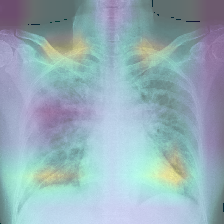

In [10]:
alpha = 0.6
validation_img = grid * alpha + img_inp
validation_img = tf.keras.preprocessing.image.array_to_img(validation_img)
display(validation_img)

In [11]:
help(validation_img)

Help on Image in module PIL.Image object:

class Image(builtins.object)
 |  This class represents an image object.  To create
 |  :py:class:`~PIL.Image.Image` objects, use the appropriate factory
 |  functions.  There's hardly ever any reason to call the Image constructor
 |  directly.
 |  
 |  * :py:func:`~PIL.Image.open`
 |  * :py:func:`~PIL.Image.new`
 |  * :py:func:`~PIL.Image.frombytes`
 |  
 |  Methods defined here:
 |  
 |  __array__(self, dtype=None)
 |  
 |  __copy__ = copy(self)
 |  
 |  __enter__(self)
 |      # Context manager support
 |  
 |  __eq__(self, other)
 |      Return self==value.
 |  
 |  __exit__(self, *args)
 |  
 |  __getattr__(self, name)
 |  
 |  __getstate__(self)
 |  
 |  __init__(self)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  __setstate__(self, state)
 |  
 |  alpha_composite(self, im, dest=(0, 0), source=(0, 0))
 |      'In-place' analog of Image.alpha_composite. Co

b"kNnkNnkNnkNnkNnkNnkNnkNnkNnkNnkNnkNnkNnkNnkNnkNnlOnlQnlSnlUnlWnlYnl[nl]nl^nl`nkbnkdnjenjgniinijnhlngmngnnfnnenndnndnncnnbnnbnnann`nn`nn_nn_nn^nn^nn]nn]nn]nn]nn]nn]nn]nn\\nn\\nn\\nn\\nn\\nn\\nn[nn[nn[nn[nn[nn[nn[nnZnnZnnZnnZnn[oo\\rr]uu^vv_ww`{{`{{`{{`zzc~~e\x7f\x7fi\x86\x86k\x89\x89o\x8d\x8du\x97\x97u\x97\x97{\x9d\xa0\x7f\x9f\xa4\x83\xa1\xab\x85\xa1\xae\x88\xa1\xb1\x8d\xa4\xb9\x90\xa5\xbc\x9a\xac\xc4\x96\xa6\xbf\x9d\xaa\xc6\x99\xa4\xc0\xa7\xaf\xcc\xa5\xaa\xca\xa7\xaa\xca\xa6\xa6\xc8\xa8\xa6\xc8\xa7\xa2\xc6\xa3\x9c\xc0\xa0\x96\xbb\xa0\x94\xba\xa0\x92\xba\x9e\x8d\xb5\x97\x84\xad\x9d\x8a\xb2\x99\x87\xaf\x9c\x8d\xb4\x9c\x8e\xb5\xa2\x95\xbc\x9b\x90\xb7\x9b\x92\xb7\xa0\x98\xbd\xa2\x9d\xc1\xaa\xa6\xc9\xab\xa9\xcb\xa5\xa4\xc6\x98\x99\xbb\x99\x9c\xbc\x97\x9d\xbc\x9d\xa4\xc2\x9c\xa4\xc1\x9d\xa8\xc4\x91\x9e\xb9\x8f\x9d\xb7\x90\xa0\xb9\x8c\x9e\xb3\x82\x95\xa3\x82\x97\xa4\x82\x99\xa5\x7f\x98\xa2{\x95\x9cv\x92\x94v\x93\x94o\x89\x89m\x86\x86l\x85\x85l\x85\x85k\x84\x84k\x84\x84k\x84\x84j\x83\x83h\x8

In [12]:
import matplotlib.pyplot as plt

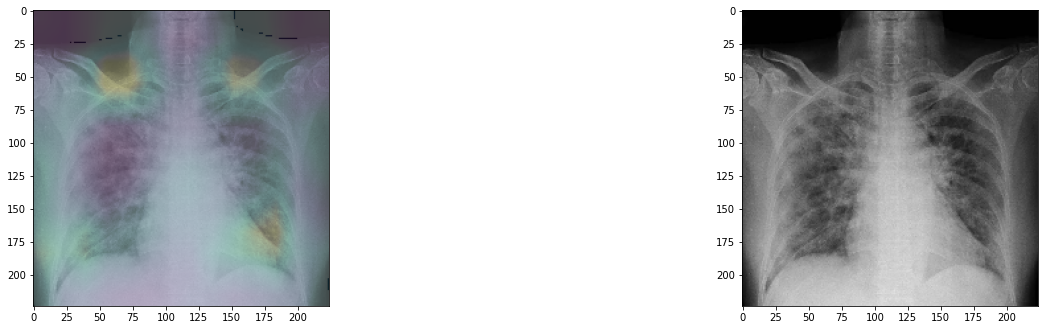

In [20]:
fig = plt.figure(figsize=(18, 8))

ax1 = fig.add_subplot(1, 3, 1)
ax1.imshow(img_inp / 255.)
ax1.imshow(grid, alpha=0.3)

ax3 = fig.add_subplot(1, 3, 3)
ax3.imshow(img_inp / 255. )